In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
csv_file_path = '/home/lucas/UFOP/ple_2020/analise_midias_sociais/final-work/data/all_pp_posts_bolsonaro_replaced_to_empty_removing_other_words.csv'
df_candidate = pd.read_csv(csv_file_path,encoding = 'utf-8')

In [3]:
df_candidate.head(15)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
0,2020-03-22T18:47:55+0000,211857482296579_1826486634166981,agora videoconferencia presidente jair bolsona...,agora videoconferencia presidente presidente...,23151,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p180x54...,129465,147,318,21,112,10345,True
1,2020-03-22T16:30:39+0000,211857482296579_1826339070848404,inscricoes selecao profissionais atuacao progr...,inscricoes selecao profissionais atuacao progr...,5703,mobile_status_update,None,52238,128,61,5,43,2514,True
2,2020-03-22T13:37:26+0000,211857482296579_1826130007535977,ministerio saude ministro mandetta reuniao vir...,ministerio saude ministro mandetta reuniao vir...,11818,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p180x54...,97986,73,141,16,65,6292,True
3,2020-03-22T11:07:01+0000,211857482296579_1825937284221916,governo federal distribui milhoes testes rapid...,governo federal distribui milhoes testes rapid...,39284,mobile_status_update,None,165539,88,393,20,68,16747,True
4,2020-03-22T02:06:48+0000,211857482296579_1825422034273441,chama precaucao medicamento barato caso venha ...,chama precaucao medicamento barato caso venha ...,27236,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/9052732...,162513,968,318,88,509,20723,True
5,2020-03-21T22:22:48+0000,211857482296579_1825061764309468,reconheco seriedade momento temor muitos brasi...,reconheco seriedade momento temor muitos brasi...,40794,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/9065012...,305358,918,478,266,1267,48834,True
6,2020-03-21T18:36:01+0000,211857482296579_1824728371009474,hospital albert einstein possivel cura pacient...,hospital albert einstein possivel cura pacient...,201803,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/75...,215237,480,815,60,431,34278,True
7,2020-03-21T11:33:30+0000,211857482296579_1824261207722857,dois dedos prosa ratinho assista,dois dedos prosa ratinho assista,33971,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/83...,106117,336,317,113,624,15368,True
8,2020-03-21T02:37:00+0000,211857482296579_1823872341095077,assinei medida provisoria deixando claro ser c...,assinei medida provisoria deixando claro ser c...,9174,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/s720x72...,112873,181,200,106,1121,7582,True
9,2020-03-21T00:16:41+0000,211857482296579_1823743497774628,via eduardo bolsonaro,via eduardo,8150,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-0/p600x60...,79762,435,111,13,160,6480,True


In [4]:
n_total_posts = len(df_candidate)
print('número total de posts: {0}'.format(str(n_total_posts)))

número total de posts: 3646


In [5]:
n_posts_with_textual_messages = df_candidate[df_candidate.has_textual_message == True].shape[0]
n_posts_without_textual_messages = df_candidate[df_candidate.has_textual_message == False].shape[0]

print('número de posts com mensagens textuais: {0}'.format(str(n_posts_with_textual_messages)))
print('número de posts sem mensagens textuais: {0}'.format(str(n_posts_without_textual_messages)))

número de posts com mensagens textuais: 3394
número de posts sem mensagens textuais: 252


In [7]:
# separando o df de treinamento (30%) e o df de testes(70%) de maneira 'embaralhada'
df_training, df_test = train_test_split(df_candidate,train_size=0.7,test_size=0.3,shuffle=True)

In [8]:
print('número de posts do conjunto de treinamento (70%): {0}'.format(str(len(df_training))))
df_training.head(5)

número de posts do conjunto de treinamento (70%): 2552


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
2719,2016-04-24T16:24:13+0000,211857482296579_621819147967075,lpj levante popular juventude servico ditadura...,lpj levante popular juventude servico ditadura...,4277,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/12...,22488,2085,85,109,3016,98,True
1991,2017-07-18T20:05:31+0000,211857482296579_876569865825334,seguranca publica brasil x usa luis miranda us...,seguranca publica brasil x usa luis miranda usa,6108,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/20...,26540,50,242,27,39,1412,True
240,2020-02-19T16:51:11+0000,211857482296579_1785259438289701,assinado decreto cria programa brasil iniciati...,assinado decreto cria programa brasil iniciati...,7321,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/82...,32982,27,75,1,6,2249,True
273,2020-02-14T14:33:36+0000,211857482296579_1779707258844919,governo caem homicidios violencia falacias,governo caem homicidios violencia falacias,8522,added_photos,https://scontent.xx.fbcdn.net/v/t1.0-9/s720x72...,47859,199,145,7,13,4769,True
247,2020-02-18T15:14:23+0000,211857482296579_1784057031743275,riscopais cai pontos menor nivel anos uniao le...,riscopais cai pontos menor nivel anos uniao le...,13026,mobile_status_update,None,102929,276,312,6,42,9055,True


In [9]:
print('número de posts do conjunto de teste (30%): {0}'.format(str(len(df_test))))
df_test.head(5)

número de posts do conjunto de teste (30%): 1094


,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message
3390,2014-05-07T15:13:14+0000,211857482296579_316968301785496,bolsonaro minutos video feito anos defendia de...,minutos video feito anos defendia deputado ...,9070,shared_story,https://external.xx.fbcdn.net/safe_image.php?w...,16436,0,0,0,0,0,True
1357,2018-06-16T13:49:29+0000,211857482296579_1089975854484733,herodoto barbeiro existe processo corrupcao im...,herodoto barbeiro existe processo corrupcao im...,15008,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/32...,26206,1080,96,1,9,1987,True
2384,2016-11-01T11:19:40+0000,211857482296579_714999215315734,tv uol corrida presidencial,tv uol corrida presidencial,259,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/14...,4368,114,10,1,10,129,True
2635,2016-06-22T20:12:06+0000,211857482296579_647412925407697,obrigado bia kicis,obrigado bia kicis,7415,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/13...,31484,24,39,18,116,681,True
2580,2016-06-30T11:00:00+0000,211857482296579_650336078448715,internet sido mim unica alternativa tentar des...,internet sido mim unica alternativa tentar des...,19963,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/13...,42912,30,131,11,11,1103,True


In [10]:
#============================================================================================
# Implementacao do lda
#============================================================================================

In [11]:
# min_df = 0.01 significa "ignorar termos que aparecem em menos de 1% dos documentos
# max_df = 0.50 significa "ignorar termos que aparecem em mais de 50% dos documentos ".

# max_features=40000
cv = CountVectorizer(stop_words = "english")

data_vectorized = cv.fit_transform(df_training['m_m_p_replaced_to_empty'])

In [59]:
n_components = 6

model_lda = LatentDirichletAllocation(n_components=n_components, # Number of topics
                                      max_iter=100,
                                      #learning_method='online',
                                      random_state=100,
                                      batch_size=128,            
                                      evaluate_every = -1,       
                                      n_jobs = -1,               
                                     )
model_lda.fit(data_vectorized)

LatentDirichletAllocation(max_iter=100, n_components=6, n_jobs=-1,
                          random_state=100)

In [60]:
# objetivo: tentar encontrar um numero bom de tópicos a fim de conseguirmos destinguir as
# categorias 

'''
#forma antiga
for index, topic in enumerate(model_lda.components_):
    print(f'Top 10 words for #{index}')
    main_words_for_topic = [cv.get_feature_names()[i] for i in topic.argsort()[-10:]]
    print(main_words_for_topic)
    print(str(len(main_words_for_topic)))
    message = ' '
    message = message.join(main_words_for_topic)
    print(message)
    print('\n')
'''
# Mostrar as n principais palavras-chave para cada tópico 
def get_topics(vectorizer=cv, lda_model=model_lda, n_words=15):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (topic_weights).argsort()[-n_words:]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords


topic_keywords = get_topics(cv,model_lda,10)

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Palavra '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Tópico '+str(i) for i in range(df_topic_keywords.shape[0])]

df_topic_keywords

,Palavra 0,Palavra 1,Palavra 2,Palavra 3,Palavra 4,Palavra 5,Palavra 6,Palavra 7,Palavra 8,Palavra 9
Tópico 0,grande,policia,governo,sp,brasilia,boa,noite,todos,federal,brasil
Tópico 1,liberdade,camara,eduardo,voto,governo,anos,carlos,presidente,pt,brasil
Tópico 2,paulo,dia,apoio,bom,consideracao,pt,abraco,brasil,todos,obrigado
Tópico 3,aeroporto,milhoes,infraestrutura,semana,programa,presidente,economia,governo,brasil,ministerio
Tópico 4,video,hoje,assista,todos,presidente,contra,estado,pt,verdade,brasil
Tópico 5,direitos,humanos,flavio,pt,ser,federal,hoje,deputado,brasil,eduardo


In [61]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Log Likelihood: ", model_lda.score(data_vectorized)) # Maior, melhor
print("Perplexity: ", model_lda.perplexity(data_vectorized)) # Menor, Melhor
# See model parameters
print(model_lda.get_params())

Log Likelihood:  -387792.2834439073
Perplexity:  6587.160536835923
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 100, 'mean_change_tol': 0.001, 'n_components': 6, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [93]:
classifications = ['Policia','Câmara/Deputados','Agradecimento','Investimentos/Economia','Convidando a assistir e Comunicação','Direitos Humanos']

df_topic_keywords ["Classificacao"] = classifications

df_topic_keywords


,Palavra 0,Palavra 1,Palavra 2,Palavra 3,Palavra 4,Palavra 5,Palavra 6,Palavra 7,Palavra 8,Palavra 9,Classificacao
Tópico 0,grande,policia,governo,sp,brasilia,boa,noite,todos,federal,brasil,Policia
Tópico 1,liberdade,camara,eduardo,voto,governo,anos,carlos,presidente,pt,brasil,Câmara/Deputados
Tópico 2,paulo,dia,apoio,bom,consideracao,pt,abraco,brasil,todos,obrigado,Agradecimento
Tópico 3,aeroporto,milhoes,infraestrutura,semana,programa,presidente,economia,governo,brasil,ministerio,Investimentos/Economia
Tópico 4,video,hoje,assista,todos,presidente,contra,estado,pt,verdade,brasil,Convidando a assistir e Comunicação
Tópico 5,direitos,humanos,flavio,pt,ser,federal,hoje,deputado,brasil,eduardo,Direitos Humanos


In [63]:
def predict_topic(text,vectorizer=cv):
    # vetorizacao
    text_vectorized = vectorizer.transform([text])
    # LDA do texto
    topic_probability_scores = model_lda.transform(text_vectorized)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), 0:10].values.tolist()
    # inferindo o topico
    infer_topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), -1]
    return infer_topic, topic, topic_probability_scores


# Predict the topic
mytext = 'A policia operou naquele dia'

# educação esta ligado a lgbt (topico 5)

infer_topic, topic, prob_scores = predict_topic(text = mytext)
print(prob_scores)
print(topic)
print(infer_topic)

[[0.48336035 0.3482247  0.04209455 0.04193494 0.04229811 0.04208735]]
['grande', 'policia', 'governo', 'sp', 'brasilia', 'boa', 'noite', 'todos', 'federal', 'brasil']
Policia


In [ ]:
#===========================================================================
# analise dos 100 posts com mais reacoes angry (segundo o nosso modelo)
#===========================================================================

In [77]:
#===========================================================================
# removendo os posts sem menssagens do df_candidate (todos os posts)
#===========================================================================
print('tamanho anterior do df candidate: {0}'.format(str(len(df_candidate))))
filter_mask  = df_candidate['has_textual_message'] == True
df_candidate = df_candidate[filter_mask]
print('número de posts do df candidate desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_candidate))))

tamanho anterior do df candidate: 3646
número de posts do df candidate desconsiderando os posts sem menssagens textuais: 3394


In [95]:

#===========================================================================
# filtrando os posts do ano de 2018
#===========================================================================

time_mask = (df_candidate['created_time'] >= '2018-01-01') & (df_candidate['created_time'] <= '2018-12-31')

df_election = df_candidate[time_mask]

In [96]:
#===========================================================================
# ordenando df_candidate por reacoes angry
#===========================================================================

df_election_sorted_by_angry = df_election.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [98]:
#===========================================================================
# obtendo os 100 posts mais angry
#===========================================================================

df_election_sorted_by_angry_100_most = df_election_sorted_by_angry.head(100)

In [100]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_election_sorted_by_angry_100_most['topic_classification'] = df_election_sorted_by_angry_100_most['m_m_p_replaced_to_empty'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

/home/lucas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [102]:
#===========================================================================
# contando as categorias de tópicos apenas para as 100 postagens com +
# reações angry durante o ano de 2018
#===========================================================================

category_count_2018_sorted_by_angry = df_election_sorted_by_angry_100_most['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Convidando a assistir e Comunicação    31
Direitos Humanos                       20
Investimentos/Economia                 19
Câmara/Deputados                       12
Agradecimento                          10
Policia                                 8
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

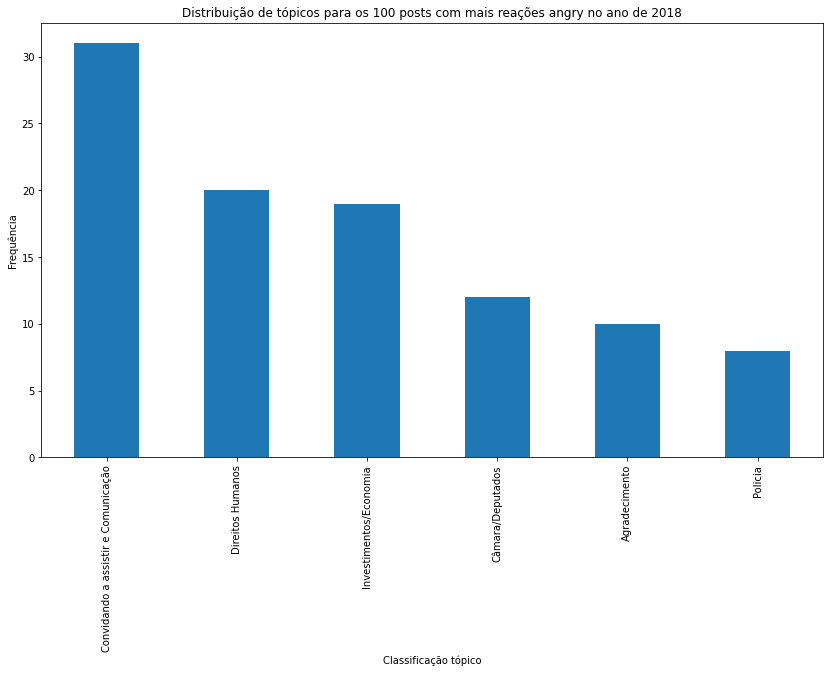

In [109]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018 para os posts com mais reações angry - 100)
#===========================================================================

ax = category_count_2018_sorted_by_angry.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos para os 100 posts com mais reações angry no ano de 2018")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [116]:
#===========================================================================
# etapa de testes (apenas p/ testes no df_test)
#===========================================================================

In [111]:
#===========================================================================
# removendo os posts sem menssagens do df_test
#===========================================================================
print('tamanho anterior do df test: {0}'.format(str(len(df_test))))
filter_mask  = df_test['has_textual_message'] == True
df_test = df_test[filter_mask]
print('número de posts do df teste desconsiderando os posts sem menssagens textuais: {0}'.format(str(len(df_test))))

tamanho anterior do df test: 1003
número de posts do df teste desconsiderando os posts sem menssagens textuais: 1003


In [112]:
#===========================================================================
# predizendo o topico por de cada uma das mensagens por meio do modelo lda
#===========================================================================

df_test['topic_classification'] = df_test['m_m_p_replaced_to_empty'].apply(lambda text:predict_topic(text,vectorizer=cv)[0])

In [113]:
df_test.head(10)

,created_time,id,message_max_processed,m_m_p_replaced_to_empty,shares,status_type,full_picture,reactions_like,reactions_haha,reactions_wow,reactions_sad,reactions_angry,reactions_love,has_textual_message,topic_classification
3390,2014-05-07T15:13:14+0000,211857482296579_316968301785496,bolsonaro minutos video feito anos defendia de...,minutos video feito anos defendia deputado ...,9070,shared_story,https://external.xx.fbcdn.net/safe_image.php?w...,16436,0,0,0,0,0,True,Convidando a assistir e Comunicação
1357,2018-06-16T13:49:29+0000,211857482296579_1089975854484733,herodoto barbeiro existe processo corrupcao im...,herodoto barbeiro existe processo corrupcao im...,15008,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/32...,26206,1080,96,1,9,1987,True,Convidando a assistir e Comunicação
2384,2016-11-01T11:19:40+0000,211857482296579_714999215315734,tv uol corrida presidencial,tv uol corrida presidencial,259,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/14...,4368,114,10,1,10,129,True,Agradecimento
2635,2016-06-22T20:12:06+0000,211857482296579_647412925407697,obrigado bia kicis,obrigado bia kicis,7415,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/13...,31484,24,39,18,116,681,True,Câmara/Deputados
2580,2016-06-30T11:00:00+0000,211857482296579_650336078448715,internet sido mim unica alternativa tentar des...,internet sido mim unica alternativa tentar des...,19963,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/13...,42912,30,131,11,11,1103,True,Agradecimento
1171,2018-10-01T23:32:59+0000,211857482296579_1965832073456066,politica questoes nacionais parte flavio bolso...,politica questoes nacionais parte flavio liv...,133176,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/40...,242392,1699,1122,215,977,96189,True,Investimentos/Economia
3522,2014-02-05T15:49:08+0000,211857482296579_1463104723901733,medica cubana deserta programa medicos pt conf...,medica cubana deserta programa medicos pt conf...,356,shared_story,https://external.xx.fbcdn.net/safe_image.php?d...,455,0,0,0,0,0,True,Convidando a assistir e Comunicação
2017,2017-06-27T14:35:34+0000,211857482296579_863343733814614,lula vale pena ser honesto brasil,vale pena ser honesto brasil,13260,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/19...,28660,5502,137,39,309,1338,True,Convidando a assistir e Comunicação
2067,2017-05-21T21:06:09+0000,211857482296579_842625229219798,cabrini entrevista bolsonaro sbt conexao repor...,cabrini entrevista sbt conexao reporter hoje...,7041,added_video,https://scontent.xx.fbcdn.net/v/t15.5256-10/18...,30367,133,91,2,16,1730,True,Câmara/Deputados
749,2019-08-27T11:04:19+0000,211857482296579_1568024260013221,brasil atingiu primeiro semestre segundo melho...,brasil atingiu primeiro semestre segundo melho...,4790,mobile_status_update,None,45070,128,352,5,79,3328,True,Câmara/Deputados


In [114]:
#===========================================================================
# ordenando df_test por reacoes angry
#===========================================================================

df_test_sorted_by_angry = df_test.sort_values('reactions_angry', ascending=False) # ordenando o df por angry

In [115]:
#===========================================================================
# contando as categorias de tópicos apenas para as 100 postagens com +
# reações angry no df teste
#===========================================================================

category_count_2018_sorted_by_angry = df_test_sorted_by_angry.head(100)['topic_classification'].value_counts()
print(category_count_2018_sorted_by_angry)

Convidando a assistir e Comunicação    28
Direitos Humanos                       24
Investimentos/Economia                 17
Câmara/Deputados                       15
Agradecimento                          12
Policia                                 4
Name: topic_classification, dtype: int64


Text(0, 0.5, 'Frequência')

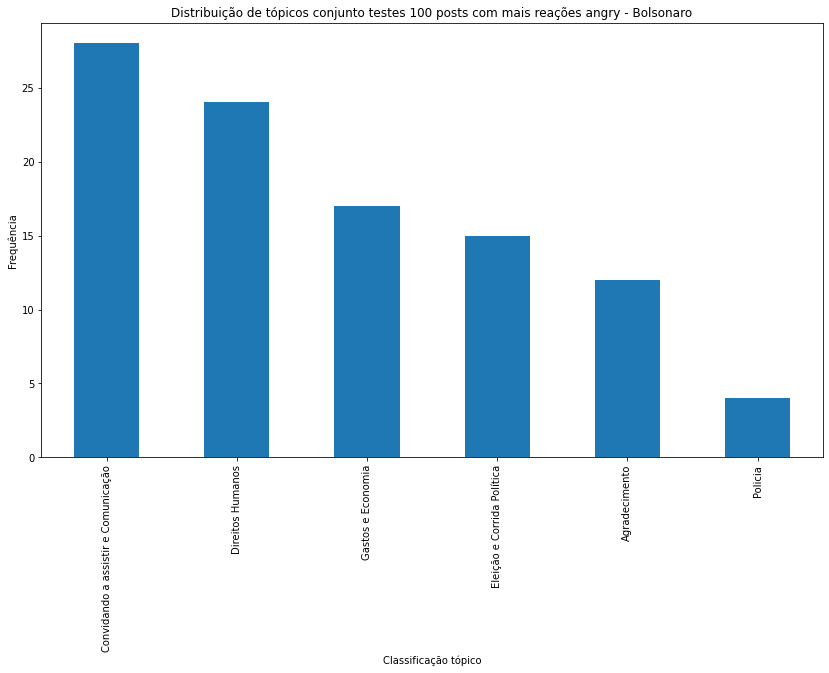

In [90]:
#===========================================================================
# as composicoes de topico relativas da amostra são então iluminadas com um 
# gráfico de barras (ano de 2018 para os posts com mais reações angry - 100)
#===========================================================================

ax = category_count_2018_sorted_by_angry.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Distribuição de tópicos conjunto testes 100 posts com mais reações angry - Bolsonaro")
ax.set_xlabel("Classificação tópico")
ax.set_ylabel("Frequência")

In [94]:
#===========================================================================
# Iterando sobre o df para visualizar as menssagens e seus topicos inferidos
#===========================================================================

for index,row in df_test_sorted_by_angry.iterrows():
   print(row['id'],row['m_m_p_replaced_to_empty'],':::',row['topic_classification'],'\n\n')

211857482296579_1786512408164404 globo bota culpa   tiros cid   ::: Convidando a assistir e Comunicação 


211857482296579_829211047227883 cut usando metodos democraticos aeroporto santos dumont mesma cut diz defender trabalhadores ::: Direitos Humanos 


211857482296579_1340804376068545 via twitter justcarol atencao cenas fortes debaixo lei sharia mulher morta pedradas varias covardes muculmanos cultura querem invadir ocidente submeter tipo aberracao via twitter paulomatrins maiores absurdos acontecem planeta contra violencia esquerdistas feministas levantam ::: Direitos Humanos 


211857482296579_1528915783924069 partida vitoria conquista inauguracao aeroporto lamentavel decisao governador bahia autorizou presenca policia militar seguranca pior ainda passou responsabilidade tal negativa comandante geral ::: Gastos e Economia 


211857482296579_966601090155544   governadores eleitos democraticamente merecem estar presos porque roubaram povo ::: Policia 


211857482296579_1017016508447

211857482296579_1530895757059405 hoje estarei manaus agenda suframa bem colegio militar policia militar amazonas bom dia todos ::: Convidando a assistir e Comunicação 


211857482296579_1814988555316789 campinassp ::: Policia 


211857482296579_1608606472621666 frente brasil programa governo lancado ministro sergio moro apresenta grandes resultados apenas dias cinco municipios onde acao implementada registraram queda homicidios mes setembro relacao agosto brasil avanca projetopiloto realizado cidades ananindeua pa cariacica es goiania go paulista pe jose pinhais pr contou trabalho conjunto forcas seguranca esferas federal estadual municipal parabens todos excelente trabalho ::: Gastos e Economia 


211857482296579_1728198310662481 depoimentos mostram rumos economia importancia turismo equipe exemplo continuara empenhando colocar brasil local destaque merece ::: Gastos e Economia 


211857482296579_815326238616364 bancada piaui antena ::: Eleição e Corrida Política 


211857482296579_10


211857482296579_604750119673978 dia votacao impeachment final abril vamos todos sitiar congresso nacional ::: Convidando a assistir e Comunicação 


211857482296579_1669418419873804 ruas santos obrigado paulo ::: Agradecimento 


211857482296579_598697570279233 camara aprova fosfoetanolamina pi  cancer deputado federal sp eduardo   ::: Direitos Humanos 


211857482296579_770155709800084 direitos humanos concederam marginais direito matar policiais impor terror sociedade reverteremos dia excludente ilicitude homens seguranca operacoes ::: Policia 


211857482296579_1780145822134396 primeiro ano governo menor indice assassinatos decada lado certo ::: Eleição e Corrida Política 


211857482296579_1803198556495789 via twitter abrahamweint paulo freire kit gay vez mec pres    vejam amostra formatoconteudo material professor carlosnadalim preparou criancas querem saber sigam prof carlosnadalim novo rosto primeiro sorriso ensino brasil governo caminha contramao formacao militancia destruir l

211857482296579_1000374790111507 brasil queremos ::: Agradecimento 


211857482296579_925099960972324 gestos simples uniao todos passagem reserva suboficial soldado almirante adsumus ::: Gastos e Economia 


211857482296579_1422326844582964 hospital grupo assistencia crianca cancer recebe pacientes varias fases tratamento referencia atendimento criancas jovens anos toda regiao metropolitana vale paraiba atendendo populacao carente regiao caixa noticias ::: Gastos e Economia 


211857482296579_1440454662770182 empreendedorismo beneficia todos gera consciencia preserva meio ambiente trabalho secretario pesca aquicultura jorge seif dando resultado gerando empregos ::: Gastos e Economia 


211857482296579_866721366810184 aniversario corpo bombeiros militarrj pagando patria ::: Agradecimento 


211857482296579_784306675051654   capitulos parte l trecho entrevista concedida programa cb poder correio braziliense fev ::: Gastos e Economia 


211857482296579_1101373850011600 paulo guedes   busc

211857482296579_551145761701081 governo busca maneiras censurar internet via cpi crimes ciberneticos conducao firme presidente mariana carvalhoro repele oportunistas peco assistir intervencao ::: Eleição e Corrida Política 


211857482296579_544186342397023 ontem tarde presidente camara indeferiu pedido impeachment sob argumento pedaladas fiscais outros atos presidente materializavam indicios crime responsabilidade ainda ontem noite x tcu pratica concordou presidente camara pedaladas representavam indicios provas crime responsabilidade praticados presidente dilma rousseff hoje h protocolei recurso contra indeferimento presidente eduardo cunha pode ter agido corretamente tarde ontem hoje apos julgado tcu dificilmente deixaria deferir requerimento recurso protocolado caminho impeachment ironia destino fica curto ps hoje h desembarcarei aeroporto belem cumprir agenda deputado delegado eder mauro obrigado povo manifestacao carinho agora demonstrada ::: Convidando a assistir e Comunicação 
